## 1. Machine Learning (Classification)

For the first question, I will be using the following models/estimators:

- Support Vector Machines 
- k-nearest neighbors 
- Logistic regression 

### 1a Dataset: sklearn.datasets.lod_breat_cancer


In [203]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [204]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, KFold


## part 1b



In [206]:
Knn_model = KNeighborsClassifier()
Svc_model=SVC()
Logistic_model = LogisticRegression(solver='liblinear')


In [207]:
# 

estimators = {
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='liblinear')}

In [208]:
Data = load_breast_cancer()
X = Data.data
y = Data.target

In [209]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## b) Using K=2 for cross validation

In [210]:
#Using k=2 fold
# change random state 
k_2_fold = KFold(n_splits=2, random_state=11, shuffle=True)


for estimator_name, estimator_object in estimators.items():
    scores = cross_val_score(estimator_object, X, y, cv=k_2_fold)
    print(f'{estimator_name} mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

SVC mean accuracy=91.21%; standard deviation=0.34%
KNeighborsClassifier mean accuracy=93.32%; standard deviation=0.34%
LogisticRegression mean accuracy=94.55%; standard deviation=0.89%


Evaluating performance:<br>
*Among of the three estimators/model, we can see that KNighbers and Logistice performace the best, and the SVC performaces the worset when using k=2*<br>
*This analysis assume we are looking at the  *mean accuracy* for each model.<br>*
****LogisticRegression Performes the best when using k=2****<br>s.




## C) Using K=20

In [211]:
# LogisticRegression
k_20_fold = KFold(n_splits=20, random_state=50, shuffle=True)
for estimator_name, estimator_object in estimators.items():
    k_20_fold = KFold(n_splits=20, random_state=11, shuffle=True)
    scores = cross_val_score(estimator_object, X, y, cv=k_20_fold)
    print(f'{estimator_name} mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

SVC mean accuracy=91.39%; standard deviation=6.40%
KNeighborsClassifier mean accuracy=92.80%; standard deviation=4.48%
LogisticRegression mean accuracy=95.43%; standard deviation=3.99%


Evaluating performance:<br>
*Among of the three estimators/model, we can see that KNighbers and Logistice performace the best, and the SVC performaces the worset when using k=2*<br>
*This analysis assume we are looking at the  *mean accuracy* for each model.<br>*
<br>****LogisticRegression still Performes the best when using k=20**** <br>
r>

***20-fold vs 2-fold cross-validation:***<br>
The only noticable difference between the classifiers when using K=20 and K=2 is the standard standard deviation. <br>
standard deviation is higher when K=20 and lower when k=2. The accuracy for the classifier remian very close one another when using either k value.<br>
## **Answer: Logistic Regression remian the  best when K=20** ##

## D) confusion matrix

Confussion matrix for K=20 fold cross validation

estimator: LogisticRegression 
conf_mat
[[197  15]
 [ 11 346]]




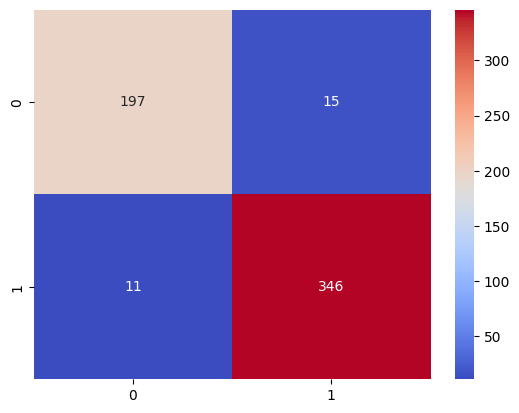

In [237]:
print("Confussion matrix for K=20 fold cross validation\n")
y_pred = cross_val_predict(Logistic_model, X, y, cv=k_20_fold)
conf_matrix = confusion_matrix(y, y_pred)
confusion_df = pd.DataFrame(conf_matrix)
figure = plt.figure()
axes = sns.heatmap(confusion_df,fmt='d', annot=True, 
                   cmap='coolwarm')
print(f"estimator: {estimator_name} \nconf_mat\n{conf_matrix}")
print("\n")

## E) confusion matrix analysis.

**True negatives (TN) = 197: These are instances where the classifier correctly identifies benign cases as benign(0)**<br>
**False positives (FP) = 15: These are instances where the classifier incorrectly predicts benign cases as malignant(1)**<br>
**False negatives (FN) = 11: These are instances where the classifier incorrectly predicts malignant cases as benign(0)**<br>
**True positives (TP) = 346: These are instances where the classifier correctly identifies malignant cases as malignant(1)**<b>


<br>**The classifier performs well in accurately identifying benign cases.
However, there's a higher likelihood of misclassification for malignant cases, particularly with false negatives, which could have serious consequences in terms of patient care and treatment decisions**.

## 2. Machine Learning (Regression)
